# Hazard map

## (1) Hazard map for heracleum_mantegazzianum

In [3]:
#### heracleum_mantegazzianum

import rasterio
import numpy as np
import os


base_folder = 'N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map'
distribution_raster = "N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f05_distribution/f02_distribution_model_luxembourg/heracleum_mantegazzianum_RandomForest_model_2169_v2.tif"




# Function to apply a buffer to a raster and write the buffer distance as the value
def buffer_raster(input_raster, output_raster, buffer_distance):
    # Open the raster file
    with rasterio.open(input_raster) as src:
        # Read the raster data
        data = src.read(1)  # Read the first band (usually the data you want)
        
        # Get raster metadata
        profile = src.profile
        
        # Get pixel size (assuming square cells)
        pixel_size = abs(profile['transform'][0])  # cell size in map units (e.g., meters)
        
        # Buffer distance in pixels
        buffer_pixels = int(buffer_distance / pixel_size)
        
        # Create a kernel (a square window) to apply around each pixel
        kernel_size = 2 * buffer_pixels + 1
        kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
        
        # Create an output array for the buffered raster
        buffered_data = np.zeros_like(data, dtype=np.float32)
        
        # Apply the kernel as a convolution (simple box filter)
        for i in range(buffer_pixels, data.shape[0] - buffer_pixels):
            for j in range(buffer_pixels, data.shape[1] - buffer_pixels):
                # Define the region of interest (ROI) around the current pixel
                roi = data[i-buffer_pixels:i+buffer_pixels+1, j-buffer_pixels:j+buffer_pixels+1]
                
                # If any of the ROI values are non-zero (indicating presence), set the pixel as the buffer distance
                if np.any(roi > 0):  # Adjust this condition for more complex buffering
                    buffered_data[i, j] = buffer_distance  # Assign the buffer distance as the pixel value
        
        # Write the buffered raster to an output file
        profile.update(dtype=rasterio.float32, count=1)
        with rasterio.open(output_raster, 'w', **profile) as dst:
            
            dst.write(buffered_data, 1)  # Write the first band of the buffered raster

# Example usage





In [9]:
import os
buffer_list = (10
            ,20
            ,30
            ,40
            ,50
            ,60
            ,70
            ,80
            ,90
            ,100
            ,110
            ,120
            ,130
            ,140
            ,150
            ,160
            ,170
            ,180
            ,190
            ,200
            ,210
            ,220
            ,230
            ,240
            ,250
            ,260
            ,270
            ,280
            ,290
            ,300
            ,310
            ,320
            ,330
            ,340
            ,350
            ,360
            ,370
            ,380
            ,390
            ,400
            ,410
            ,420
            ,430
            ,440
            ,450
            ,460
            ,470
            ,480
            ,490
            ,500
            ,510
            ,520
            ,530
            ,540
            ,550
            ,560
            ,570
            ,580
            ,590
            ,600
            ,610
            ,620
            ,630
            ,640
            ,650
            ,660
            ,670
            ,680
            ,690
            ,700
            ,710
            ,720
            ,730
            ,740
            ,750
            ,760
            ,770
            ,780
            ,790
            ,800
            ,810
            ,820
            ,830
            ,840
            ,850
            ,860
            ,870
            ,880
            ,890
            ,900
            ,910
            ,920
            ,930
            ,940
            ,950
            ,960
            ,970
            ,980
            ,990
            ,1000
         )
buffer_list = (10,20,990,1000  )

for buf in buffer_list:
    
    input_raster = distribution_raster  
    buffer_distance = buf  
    output_raster = base_folder +"/"+ 'single_heracleum_mantegazzianum'+"/"+'tmp_buffer_'+str(buffer_distance)+"_heracl.tif"
    # Check if the output raster already exists
    if not os.path.exists(output_raster):
        # If it doesn't exist, call the buffer_raster function to process it
        buffer_raster(input_raster, output_raster, buffer_distance)
        print(f"Processing buffer distance {buffer_distance} and saving to {output_raster}")
    else:
        # If it exists, print a message and skip processing
        print(f"Output raster {output_raster} already exists, skipping...")

    #buffer_raster(input_raster, output_raster, buffer_distance)




Output raster N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum/tmp_buffer_10_heracl.tif already exists, skipping...
Output raster N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum/tmp_buffer_20_heracl.tif already exists, skipping...
Processing buffer distance 990 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum/tmp_buffer_990_heracl.tif
Processing buffer distance 1000 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum/tmp_buffer_1000_heracl.tif


In [4]:
# read and set up raster list
import glob
import os
import re

# Define the folder path
folder_path = base_folder +"/"+ 'single_heracleum_mantegazzianum'

# Create a list of all .tif files in the folder
raster_list = glob.glob(os.path.join(folder_path, "*.tif"))


# Extract the numeric part (from the "tmp_buffer_x_heracl" part) and sort  # new order
# Sort the list of rasters in descending order by the number in the filename
raster_list = sorted(raster_list, key=lambda x: int(re.search(r'(\d+)_heracl', x).group(1)), reverse=True)

# Print the sorted list
for raster in raster_list:
    print(raster)



N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum\tmp_buffer_1000_heracl.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum\tmp_buffer_990_heracl.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum\tmp_buffer_980_heracl.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum\tmp_buffer_970_heracl.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum\tmp_buffer_960_heracl.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_heracleum_mantegazzianum\tmp_buffer_950_heracl.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_L

In [5]:
import rasterio
from rasterio.crs import CRS
import numpy as np

def overlay_rasters(raster_list, output_raster):
    """
    Overlay multiple buffer rasters and generate a final raster where each pixel contains the lowest buffer distance.
    
    Args:
        raster_list (list): List of file paths to input raster files.
        output_raster (str): File path to save the resulting raster.
    """
    # Open the first raster to use as a template
    with rasterio.open(raster_list[0]) as src:
        profile = src.profile
        profile.update(dtype=rasterio.float32)  # Ensure the output is float32
        # Read the first raster data
        combined_data = src.read(1).astype(np.float32)
    
    # Initialize the combined raster with high values (to find the minimum distance)
    combined_data[combined_data > 0] = np.inf  # Set initial non-zero buffer values to infinity
    
    # Iterate over each raster in the list
    for raster_path in raster_list:
        with rasterio.open(raster_path) as src:
            # Read current raster data
            data = src.read(1).astype(np.float32)
            # Combine using minimum values (ignoring zero background)
            combined_data = np.minimum(combined_data, np.where(data > 0, data, np.inf))
    
    # Replace infinity with zero for non-buffered areas
    combined_data[np.isinf(combined_data)] = 0
   

    # Write the resulting raster to disk
    with rasterio.open(output_raster, 'w', **profile) as dst:
        dst.write(combined_data, 1)

# Example Usage
raster_list = raster_list

output_raster = base_folder +"/"+"heracleum_mantegazzianum_buffer_distance.tif"

overlay_rasters(raster_list, output_raster)




In [6]:
output_raster = base_folder +"/"+"heracleum_mantegazzianum_buffer_distance.tif"

In [7]:
import rasterio


# Open the raster file
with rasterio.open(output_raster) as src:
    crs = src.crs  # Access the CRS

# Print the CRS
print("CRS:", crs)

CRS: LOCAL_CS["LUREF / Luxembourg TM",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


Overlay buffer raster with poi raster

N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/heracleum_mantegazzianum_buffer_distance.tif


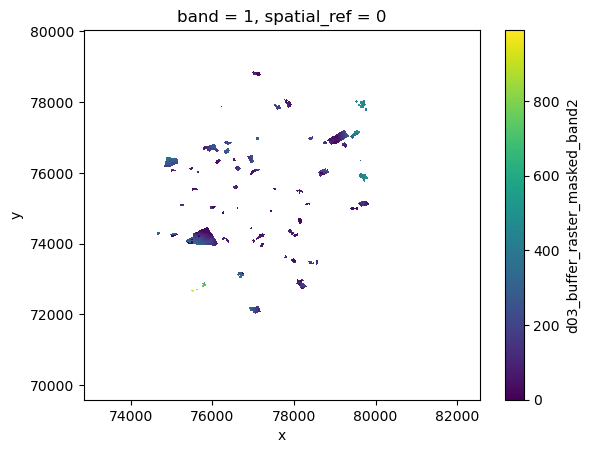

In [9]:
import xarray as xr
import rioxarray as rxr

mask_raster =  r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\aoi_osm_2024_10m_b4.tif'    #aoi_osm_2024_10m_b4  4 bands

## Datasets 01 buffer:-------------------------------------------
d01_buffer_raster = os.path.join(output_raster)
print(d01_buffer_raster)
# Open the file:
cube_01 = rxr.open_rasterio(d01_buffer_raster)
cube_01 = cube_01.to_dataset(name='d01_buffer_raster')

## Datasets 02 mask:-------------------------------------------
d02_mask_raster = os.path.join(mask_raster)
#print(d02_mask_raster)
# Open the file:
cube_02 = rxr.open_rasterio(mask_raster)
cube_02 = cube_02.to_dataset(name='d02_mask_raster')

cube_02 = cube_02.sel(band=2)   ## only band 2
cube_02
## Merge datasets:
combined_array = xr.merge([cube_01, cube_02])
combined_array

############### MASK buffer by mask:######################################################################
buffer_raster = combined_array['d01_buffer_raster']
mask_raster   = combined_array['d02_mask_raster']
# Apply the masking: set values in `buffer_raster` to NaN where `mask_raster > 0`
masked_buffer = buffer_raster.where(mask_raster > 0)
masked_buffer
# Optionally, add the masked result back to the original Dataset
combined_array['d03_buffer_raster_masked_band2'] = masked_buffer
combined_array['d03_buffer_raster_masked_band2'] .sel(band=1).plot()

#combined_array

#
## Select the specific band (e.g., Band 1) from the xarray DataArray
#band_1 = combined_array['d03_buffer_raster_masked_band2'] 
#output_file =   r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\xx.tif'   
#band_1
## note how one time slice was selected on export to make the dataset 2D
#
#band_1.rio.to_raster(output_file)

In [ ]:
import xarray as xr
import rioxarray as rxr


mask_raster =  r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\aoi_osm_2024_10m_b4.tif'    #aoi_osm_2024_10m_b4  4 bands
output_raster = base_folder +"/"+"heracleum_mantegazzianum_buffer_distance.tif"




# B1- park
# B2- school
# B3- kindergarten
# B4- dog park



band_list_aoi = (1,2,3,4)

for rband in band_list_aoi:
    
    # Initialize name variable based on band value
    if rband == 1:
        name = 'park'
    elif rband == 2:
        name = 'school'
    elif rband == 3:
        name = 'kindergarten'
    elif rband == 4:
        name = 'dog_park'
    else:
        name = 'unknown'  # In case band is not in the expected range
    output_raster_poi =  r"N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f07_hazard_map\heracleum_mantegazzianum_hazard_"+name+"_v3.tif"   
    print (str(rband))
    print ("-----------------------------------")
    ## Datasets 01 buffer:-------------------------------------------
    d01_buffer_raster = os.path.join(output_raster)
    print(d01_buffer_raster)
    # Open the file:
    cube_01 = rxr.open_rasterio(d01_buffer_raster)
    cube_01 = cube_01.to_dataset(name='d01_buffer_raster')


    ## Datasets 02 mask:-------------------------------------------
    mask_raster =  r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\aoi_osm_2024_10m_b4.tif'   
    d02_mask_raster = os.path.join(mask_raster)
    # Open the file:
    cube_02 = rxr.open_rasterio(mask_raster)
    cube_02 = cube_02.to_dataset(name='d02_mask_raster')
    cube_02 = cube_02.sel(band=rband)   ## only band 2

  #  ## Merge datasets:
    combined_array = xr.merge([cube_01, cube_02])
  #  
  #  ############### MASK buffer by mask:######################################################################
    buffer_raster = combined_array['d01_buffer_raster']

    mask_raster   = combined_array['d02_mask_raster']
  #  # Apply the masking: set values in `buffer_raster` to NaN where `mask_raster > 0`
    masked_buffer = buffer_raster.where(mask_raster > 0)
  #  
  #  # Optionally, add the masked result back to the original Dataset
    combined_array['d03_buffer_raster_masked_band_'+str(rband)] = masked_buffer

    ## export: 
    output_file    = r"N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f07_hazard_map\heracleum_mantegazzianum_hazard_"+name+".tif"   
    combined_array['d03_buffer_raster_masked_band_'+str(rband)].rio.to_raster(output_file)
    
    
print ("job done - haszard maps are exported")


1
-----------------------------------
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/heracleum_mantegazzianum_buffer_distance.tif
2
-----------------------------------
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/heracleum_mantegazzianum_buffer_distance.tif
3
-----------------------------------
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/heracleum_mantegazzianum_buffer_distance.tif
4
-----------------------------------
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/heracleum_mantegazzianum_buffer_distance.tif
job done


In [ ]:
# import rioxarray as rxr
# 
# 
# # Select the specific band (e.g., Band 1) from the xarray DataArray
# band_1 = combined_array['d03_buffer_raster_masked_band2'] 
# output_file =   r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\xx.tif'   
# band_1
# # note how one time slice was selected on export to make the dataset 2D
# 
# band_1.rio.to_raster(output_file)

## (2) Hazard map for Robinia Pseudoacacia

In [3]:
#### robinia_pseudoacacia

import rasterio
import numpy as np
import os


base_folder = 'N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map'
distribution_raster = "N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f05_distribution/f02_distribution_model_luxembourg/robinia_pseudoacacia_RandomForest_model.tif"  ## imported from s3 : https://hub-fairicube0.s3.eu-central-1.amazonaws.com/data/d012_luxembourg/habitat_potential_map/robinia_pseudoacacia/robinia_pseudoacacia_RandomForest_model.tif
species_name = 'robinia_pseudoacacia'


# Function to apply a buffer to a raster and write the buffer distance as the value
def buffer_raster(input_raster, output_raster, buffer_distance):
    # Open the raster file
    with rasterio.open(input_raster) as src:
        # Read the raster data
        data = src.read(1)  # Read the first band (usually the data you want)
        
        # Get raster metadata
        profile = src.profile
        
        # Get pixel size (assuming square cells)
        pixel_size = abs(profile['transform'][0])  # cell size in map units (e.g., meters)
        
        # Buffer distance in pixels
        buffer_pixels = int(buffer_distance / pixel_size)
        
        # Create a kernel (a square window) to apply around each pixel
        kernel_size = 2 * buffer_pixels + 1
        kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
        
        # Create an output array for the buffered raster
        buffered_data = np.zeros_like(data, dtype=np.float32)
        
        # Apply the kernel as a convolution (simple box filter)
        for i in range(buffer_pixels, data.shape[0] - buffer_pixels):
            for j in range(buffer_pixels, data.shape[1] - buffer_pixels):
                # Define the region of interest (ROI) around the current pixel
                roi = data[i-buffer_pixels:i+buffer_pixels+1, j-buffer_pixels:j+buffer_pixels+1]
                
                # If any of the ROI values are non-zero (indicating presence), set the pixel as the buffer distance
                if np.any(roi > 0):  # Adjust this condition for more complex buffering
                    buffered_data[i, j] = buffer_distance  # Assign the buffer distance as the pixel value
        
        # Write the buffered raster to an output file
        profile.update(dtype=rasterio.float32, count=1)
        with rasterio.open(output_raster, 'w', **profile) as dst:
            
            dst.write(buffered_data, 1)  # Write the first band of the buffered raster


############## BUFFER:
import os
buffer_list = (10
            ,20
            ,30
            ,40
            ,50
            ,60
            ,70
            ,80
            ,90
            ,100
            ,110
            ,120
            ,130
            ,140
            ,150
            ,160
            ,170
            ,180
            ,190
            ,200
            ,210
            ,220
            ,230
            ,240
            ,250
            ,260
            ,270
            ,280
            ,290
            ,300
            ,310
            ,320
            ,330
            ,340
            ,350
            ,360
            ,370
            ,380
            ,390
            ,400
            ,410
            ,420
            ,430
            ,440
            ,450
            ,460
            ,470
            ,480
            ,490
            ,500
            ,510
            ,520
            ,530
            ,540
            ,550
            ,560
            ,570
            ,580
            ,590
            ,600
            ,610
            ,620
            ,630
            ,640
            ,650
            ,660
            ,670
            ,680
            ,690
            ,700
            ,710
            ,720
            ,730
            ,740
            ,750
            ,760
            ,770
            ,780
            ,790
            ,800
            ,810
            ,820
            ,830
            ,840
            ,850
            ,860
            ,870
            ,880
            ,890
            ,900
            ,910
            ,920
            ,930
            ,940
            ,950
            ,960
            ,970
            ,980
            ,990
            ,1000
         )
#buffer_list = (10,20,990,1000  )

for buf in buffer_list:
    
    input_raster = distribution_raster  
    buffer_distance = buf  
    output_raster = base_folder +"/"+ 'single_'+species_name+"/"+'tmp_buffer_'+str(buffer_distance)+"_"+species_name+".tif"
    # Check if the output raster already exists
    if not os.path.exists(output_raster):
        # If it doesn't exist, call the buffer_raster function to process it
        buffer_raster(input_raster, output_raster, buffer_distance)
        print(f"Processing buffer distance {buffer_distance} and saving to {output_raster}")
    else:
        # If it exists, print a message and skip processing
        print(f"Output raster {output_raster} already exists, skipping...")

    #buffer_raster(input_raster, output_raster, buffer_distance)





Processing buffer distance 10 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia/tmp_buffer_10_robinia_pseudoacacia.tif
Processing buffer distance 20 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia/tmp_buffer_20_robinia_pseudoacacia.tif
Processing buffer distance 30 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia/tmp_buffer_30_robinia_pseudoacacia.tif
Processing buffer distance 40 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia/tmp_buffer_40_robinia_pseudoacacia.tif
Processing buffer distance 50 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/si

In [ ]:
# read and set up raster list
import glob
import os
import re
import rasterio
from rasterio.crs import CRS
import numpy as np



# Define the folder path
folder_path =  base_folder +"/"+ 'single_'+species_name


# Create a list of all .tif files in the folder
raster_list = glob.glob(os.path.join(folder_path, "*.tif"))

# Extract the numeric part (from the "tmp_buffer_x_heracl" part) and sort  # new order
# Sort the list of rasters in descending order by the number in the filename
raster_list = sorted(raster_list, key=lambda x: int(re.search(r'(\d+)_'+species_name, x).group(1)), reverse=True)

# Print the sorted list
for raster in raster_list:
    print(raster)



############# overlay buffer raster and extract min raster distance pixel value:


def overlay_rasters(raster_list, output_raster):
    """
    Overlay multiple buffer rasters and generate a final raster where each pixel contains the lowest buffer distance.
    
    Args:
        raster_list (list): List of file paths to input raster files.
        output_raster (str): File path to save the resulting raster.
    """
    # Open the first raster to use as a template
    with rasterio.open(raster_list[0]) as src:
        profile = src.profile
        profile.update(dtype=rasterio.float32)  # Ensure the output is float32
        # Read the first raster data
        combined_data = src.read(1).astype(np.float32)
    
    # Initialize the combined raster with high values (to find the minimum distance)
    combined_data[combined_data > 0] = np.inf  # Set initial non-zero buffer values to infinity
    
    # Iterate over each raster in the list
    for raster_path in raster_list:
        with rasterio.open(raster_path) as src:
            # Read current raster data
            data = src.read(1).astype(np.float32)
            # Combine using minimum values (ignoring zero background)
            combined_data = np.minimum(combined_data, np.where(data > 0, data, np.inf))
    
    # Replace infinity with zero for non-buffered areas
    combined_data[np.isinf(combined_data)] = 0
   

    # Write the resulting raster to disk
    with rasterio.open(output_raster, 'w', **profile) as dst:
        dst.write(combined_data, 1)

raster_list = raster_list

output_raster = base_folder +"/"+species_name+"_buffer_distance.tif"   
overlay_rasters(raster_list, output_raster)

print ("job done")

import xarray as xr
import rioxarray as rxr
mask_raster =  r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\aoi_osm_2024_10m_b4.tif'    #aoi_osm_2024_10m_b4  4 bands
output_raster =  base_folder +"/"+species_name+"_buffer_distance.tif"   

# B1- park
# B2- school
# B3- kindergarten
# B4- dog park

band_list_aoi = (1,2,3,4)
for rband in band_list_aoi:
    
    # Initialize name variable based on band value
    if rband == 1:
        name = 'park'
    elif rband == 2:
        name = 'school'
    elif rband == 3:
        name = 'kindergarten'
    elif rband == 4:
        name = 'dog_park'
    else:
        name = 'unknown'  # In case band is not in the expected range
    #output_raster_poi =  r"N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f07_hazard_map" +"\\" +species_name+ "_"+name+"_v1.tif"   
    print (str(rband))
    print ("-----------------------------------")
    ## Datasets 01 buffer:-------------------------------------------
    d01_buffer_raster = os.path.join(output_raster)
    print(d01_buffer_raster)
    # Open the file:
    cube_01 = rxr.open_rasterio(d01_buffer_raster)
    cube_01 = cube_01.to_dataset(name='d01_buffer_raster')


    ## Datasets 02 mask:-------------------------------------------
    mask_raster =  r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\aoi_osm_2024_10m_b4.tif'   
    d02_mask_raster = os.path.join(mask_raster)
    # Open the file:
    cube_02 = rxr.open_rasterio(mask_raster)
    cube_02 = cube_02.to_dataset(name='d02_mask_raster')
    cube_02 = cube_02.sel(band=rband)   ## only band 2

  #  ## Merge datasets:
    combined_array = xr.merge([cube_01, cube_02])
  #  
  #  ############### MASK buffer by mask:######################################################################
    buffer_raster = combined_array['d01_buffer_raster']

    mask_raster   = combined_array['d02_mask_raster']
  #  # Apply the masking: set values in `buffer_raster` to NaN where `mask_raster > 0`
    masked_buffer = buffer_raster.where(mask_raster > 0)
  #  
  #  # Optionally, add the masked result back to the original Dataset
    combined_array['d03_buffer_raster_masked_band_'+str(rband)] = masked_buffer

    ## export: 
    output_file    = r"N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f07_hazard_map" +"\\" +species_name+ "_"+name+"_v1.tif"   
    combined_array['d03_buffer_raster_masked_band_'+str(rband)].rio.to_raster(output_file)
    
    
print ("job done - haszard maps are exported")



N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia\tmp_buffer_1000_robinia_pseudoacacia.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia\tmp_buffer_990_robinia_pseudoacacia.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia\tmp_buffer_980_robinia_pseudoacacia.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia\tmp_buffer_970_robinia_pseudoacacia.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia\tmp_buffer_960_robinia_pseudoacacia.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_robinia_pseudoacacia\tmp_buffer_950_robi

## (3) fallopia_japonica

In [7]:
#### fallopia_japonica

import rasterio
import numpy as np
import os


base_folder = 'N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map'
distribution_raster = "N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f05_distribution/f02_distribution_model_luxembourg/fallopia_japonica_RandomForest_model_v2.tif" 
species_name = 'fallopia_japonica'


# Function to apply a buffer to a raster and write the buffer distance as the value
def buffer_raster(input_raster, output_raster, buffer_distance):
    # Open the raster file
    with rasterio.open(input_raster) as src:
        # Read the raster data
        data = src.read(1)  # Read the first band (usually the data you want)
        
        # Get raster metadata
        profile = src.profile
        
        # Get pixel size (assuming square cells)
        pixel_size = abs(profile['transform'][0])  # cell size in map units (e.g., meters)
        
        # Buffer distance in pixels
        buffer_pixels = int(buffer_distance / pixel_size)
        
        # Create a kernel (a square window) to apply around each pixel
        kernel_size = 2 * buffer_pixels + 1
        kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
        
        # Create an output array for the buffered raster
        buffered_data = np.zeros_like(data, dtype=np.float32)
        
        # Apply the kernel as a convolution (simple box filter)
        for i in range(buffer_pixels, data.shape[0] - buffer_pixels):
            for j in range(buffer_pixels, data.shape[1] - buffer_pixels):
                # Define the region of interest (ROI) around the current pixel
                roi = data[i-buffer_pixels:i+buffer_pixels+1, j-buffer_pixels:j+buffer_pixels+1]
                
                # If any of the ROI values are non-zero (indicating presence), set the pixel as the buffer distance
                if np.any(roi > 0):  # Adjust this condition for more complex buffering
                    buffered_data[i, j] = buffer_distance  # Assign the buffer distance as the pixel value
        
        # Write the buffered raster to an output file
        profile.update(dtype=rasterio.float32, count=1)
        with rasterio.open(output_raster, 'w', **profile) as dst:
            
            dst.write(buffered_data, 1)  # Write the first band of the buffered raster


############## BUFFER:
import os
buffer_list = (10
            ,20
            ,30
            ,40
            ,50
            ,60
            ,70
            ,80
            ,90
            ,100
            ,110
            ,120
            ,130
            ,140
            ,150
            ,160
            ,170
            ,180
            ,190
            ,200
            ,210
            ,220
            ,230
            ,240
            ,250
            ,260
            ,270
            ,280
            ,290
            ,300
            ,310
            ,320
            ,330
            ,340
            ,350
            ,360
            ,370
            ,380
            ,390
            ,400
            ,410
            ,420
            ,430
            ,440
            ,450
            ,460
            ,470
            ,480
            ,490
            ,500
            ,510
            ,520
            ,530
            ,540
            ,550
            ,560
            ,570
            ,580
            ,590
            ,600
            ,610
            ,620
            ,630
            ,640
            ,650
            ,660
            ,670
            ,680
            ,690
            ,700
            ,710
            ,720
            ,730
            ,740
            ,750
            ,760
            ,770
            ,780
            ,790
            ,800
            ,810
            ,820
            ,830
            ,840
            ,850
            ,860
            ,870
            ,880
            ,890
            ,900
            ,910
            ,920
            ,930
            ,940
            ,950
            ,960
            ,970
            ,980
            ,990
            ,1000
         )
#buffer_list = (10,20,990,1000  )

for buf in buffer_list:
    
    input_raster = distribution_raster  
    buffer_distance = buf  
    output_raster = base_folder +"/"+ 'single_'+species_name+"/"+'tmp_buffer_'+str(buffer_distance)+"_"+species_name+".tif"
    # Check if the output raster already exists
    if not os.path.exists(output_raster):
        # If it doesn't exist, call the buffer_raster function to process it
        buffer_raster(input_raster, output_raster, buffer_distance)
        print(f"Processing buffer distance {buffer_distance} and saving to {output_raster}")
    else:
        # If it exists, print a message and skip processing
        print(f"Output raster {output_raster} already exists, skipping...")

    #buffer_raster(input_raster, output_raster, buffer_distance)


Processing buffer distance 10 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica/tmp_buffer_10_fallopia_japonica.tif
Processing buffer distance 20 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica/tmp_buffer_20_fallopia_japonica.tif
Processing buffer distance 30 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica/tmp_buffer_30_fallopia_japonica.tif
Processing buffer distance 40 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica/tmp_buffer_40_fallopia_japonica.tif
Processing buffer distance 50 and saving to N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica/t

In [3]:
# read and set up raster list
import glob
import os
import re
import rasterio
from rasterio.crs import CRS
import numpy as np

base_folder = 'N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map'
species_name = 'fallopia_japonica'


# Define the folder path
folder_path =  base_folder +"/"+ 'single_'+species_name


# Create a list of all .tif files in the folder
raster_list = glob.glob(os.path.join(folder_path, "*.tif"))

# Extract the numeric part (from the "tmp_buffer_x_heracl" part) and sort  # new order
# Sort the list of rasters in descending order by the number in the filename
raster_list = sorted(raster_list, key=lambda x: int(re.search(r'(\d+)_'+species_name, x).group(1)), reverse=True)

# Print the sorted list
for raster in raster_list:
    print(raster)



############# overlay buffer raster and extract min raster distance pixel value:


def overlay_rasters(raster_list, output_raster):
    """
    Overlay multiple buffer rasters and generate a final raster where each pixel contains the lowest buffer distance.
    
    Args:
        raster_list (list): List of file paths to input raster files.
        output_raster (str): File path to save the resulting raster.
    """
    # Open the first raster to use as a template
    with rasterio.open(raster_list[0]) as src:
        profile = src.profile
        profile.update(dtype=rasterio.float32)  # Ensure the output is float32
        # Read the first raster data
        combined_data = src.read(1).astype(np.float32)
    
    # Initialize the combined raster with high values (to find the minimum distance)
    combined_data[combined_data > 0] = np.inf  # Set initial non-zero buffer values to infinity
    
    # Iterate over each raster in the list
    for raster_path in raster_list:
        with rasterio.open(raster_path) as src:
            # Read current raster data
            data = src.read(1).astype(np.float32)
            # Combine using minimum values (ignoring zero background)
            combined_data = np.minimum(combined_data, np.where(data > 0, data, np.inf))
    
    # Replace infinity with zero for non-buffered areas
    combined_data[np.isinf(combined_data)] = 0
   

    # Write the resulting raster to disk
    with rasterio.open(output_raster, 'w', **profile) as dst:
        dst.write(combined_data, 1)

raster_list = raster_list

output_raster = base_folder +"/"+species_name+"_buffer_distance.tif"   
overlay_rasters(raster_list, output_raster)

print ("job done")

import xarray as xr
import rioxarray as rxr
mask_raster =  r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\aoi_osm_2024_10m_b4.tif'    #aoi_osm_2024_10m_b4  4 bands
output_raster =  base_folder +"/"+species_name+"_buffer_distance.tif"   

# B1- park
# B2- school
# B3- kindergarten
# B4- dog park

band_list_aoi = (1,2,3,4)
for rband in band_list_aoi:
    
    # Initialize name variable based on band value
    if rband == 1:
        name = 'park'
    elif rband == 2:
        name = 'school'
    elif rband == 3:
        name = 'kindergarten'
    elif rband == 4:
        name = 'dog_park'
    else:
        name = 'unknown'  # In case band is not in the expected range
    #output_raster_poi =  r"N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f07_hazard_map" +"\\" +species_name+ "_"+name+"_v1.tif"   
    print (str(rband))
    print ("-----------------------------------")
    ## Datasets 01 buffer:-------------------------------------------
    d01_buffer_raster = os.path.join(output_raster)
    print(d01_buffer_raster)
    # Open the file:
    cube_01 = rxr.open_rasterio(d01_buffer_raster)
    cube_01 = cube_01.to_dataset(name='d01_buffer_raster')


    ## Datasets 02 mask:-------------------------------------------
    mask_raster =  r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\aoi_osm_2024_10m_b4.tif'   
    d02_mask_raster = os.path.join(mask_raster)
    # Open the file:
    cube_02 = rxr.open_rasterio(mask_raster)
    cube_02 = cube_02.to_dataset(name='d02_mask_raster')
    cube_02 = cube_02.sel(band=rband)   ## only band 2

  #  ## Merge datasets:
    combined_array = xr.merge([cube_01, cube_02])
  #  
  #  ############### MASK buffer by mask:######################################################################
    buffer_raster = combined_array['d01_buffer_raster']

    mask_raster   = combined_array['d02_mask_raster']
  #  # Apply the masking: set values in `buffer_raster` to NaN where `mask_raster > 0`
    masked_buffer = buffer_raster.where(mask_raster > 0)
  #  
  #  # Optionally, add the masked result back to the original Dataset
    combined_array['d03_buffer_raster_masked_band_'+str(rband)] = masked_buffer

    ## export: 
    output_file    = r"N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f07_hazard_map" +"\\" +species_name+ "_"+name+"_v1.tif"   
    combined_array['d03_buffer_raster_masked_band_'+str(rband)].rio.to_raster(output_file)
    
    
print ("job done - haszard maps are exported")

N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica\tmp_buffer_1000_fallopia_japonica.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica\tmp_buffer_990_fallopia_japonica.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica\tmp_buffer_980_fallopia_japonica.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica\tmp_buffer_970_fallopia_japonica.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica\tmp_buffer_960_fallopia_japonica.tif
N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map/single_fallopia_japonica\tmp_buffer_950_fallopia_japonica.tif
N:/C2205_FAIRiC

## (4) senecio_inaequidens

In [ ]:
#### senecio_inaequidens

import rasterio
import numpy as np
import os

base_folder = 'N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f07_hazard_map'
distribution_raster = r"N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f05_distribution\f02_distribution_model_luxembourg\senecio_inaequidens_RandomForest_model.tif"
species_name = 'senecio_inaequidens'


# Function to apply a buffer to a raster and write the buffer distance as the value
def buffer_raster(input_raster, output_raster, buffer_distance):
    # Open the raster file
    with rasterio.open(input_raster) as src:
        # Read the raster data
        data = src.read(1)  # Read the first band (usually the data you want)
        
        # Get raster metadata
        profile = src.profile
        
        # Get pixel size (assuming square cells)
        pixel_size = abs(profile['transform'][0])  # cell size in map units (e.g., meters)
        
        # Buffer distance in pixels
        buffer_pixels = int(buffer_distance / pixel_size)
        
        # Create a kernel (a square window) to apply around each pixel
        kernel_size = 2 * buffer_pixels + 1
        kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
        
        # Create an output array for the buffered raster
        buffered_data = np.zeros_like(data, dtype=np.float32)
        
        # Apply the kernel as a convolution (simple box filter)
        for i in range(buffer_pixels, data.shape[0] - buffer_pixels):
            for j in range(buffer_pixels, data.shape[1] - buffer_pixels):
                # Define the region of interest (ROI) around the current pixel
                roi = data[i-buffer_pixels:i+buffer_pixels+1, j-buffer_pixels:j+buffer_pixels+1]
                
                # If any of the ROI values are non-zero (indicating presence), set the pixel as the buffer distance
                if np.any(roi > 0):  # Adjust this condition for more complex buffering
                    buffered_data[i, j] = buffer_distance  # Assign the buffer distance as the pixel value
        
        # Write the buffered raster to an output file
        profile.update(dtype=rasterio.float32, count=1)
        with rasterio.open(output_raster, 'w', **profile) as dst:
            
            dst.write(buffered_data, 1)  # Write the first band of the buffered raster


############## BUFFER:
import os
buffer_list = (10
            ,20
            ,30
            ,40
            ,50
            ,60
            ,70
            ,80
            ,90
            ,100
            ,110
            ,120
            ,130
            ,140
            ,150
            ,160
            ,170
            ,180
            ,190
            ,200
            ,210
            ,220
            ,230
            ,240
            ,250
            ,260
            ,270
            ,280
            ,290
            ,300
            ,310
            ,320
            ,330
            ,340
            ,350
            ,360
            ,370
            ,380
            ,390
            ,400
            ,410
            ,420
            ,430
            ,440
            ,450
            ,460
            ,470
            ,480
            ,490
            ,500
            ,510
            ,520
            ,530
            ,540
            ,550
            ,560
            ,570
            ,580
            ,590
            ,600
            ,610
            ,620
            ,630
            ,640
            ,650
            ,660
            ,670
            ,680
            ,690
            ,700
            ,710
            ,720
            ,730
            ,740
            ,750
            ,760
            ,770
            ,780
            ,790
            ,800
            ,810
            ,820
            ,830
            ,840
            ,850
            ,860
            ,870
            ,880
            ,890
            ,900
            ,910
            ,920
            ,930
            ,940
            ,950
            ,960
            ,970
            ,980
            ,990
            ,1000
         )
#buffer_list = (10,20,990,1000  )

for buf in buffer_list:
    
    input_raster = distribution_raster  
    buffer_distance = buf  
    output_raster = base_folder +"/"+ 'single_'+species_name+"/"+'tmp_buffer_'+str(buffer_distance)+"_"+species_name+".tif"
    # Check if the output raster already exists
    if not os.path.exists(output_raster):
        # If it doesn't exist, call the buffer_raster function to process it
        buffer_raster(input_raster, output_raster, buffer_distance)
        print(f"Processing buffer distance {buffer_distance} and saving to {output_raster}")
    else:
        # If it exists, print a message and skip processing
        print(f"Output raster {output_raster} already exists, skipping...")

    #buffer_raster(input_raster, output_raster, buffer_distance)
